# Root Insurance

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
root_ins_df = pd.read_csv('Root_Insurance_data.csv')

In [13]:
root_ins_df.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


In [14]:
train_data, test_data = train_test_split(root_ins_df,
                                         stratify=root_ins_df['policies_sold'],
                                         test_size=0.33)

In [15]:
# scatter matrix not very useful here
# scatter_matrix(train_data.loc[:,train_data.columns != 'click'],figsize=(10,10))

# dividing the training data into succesful and unsuccesful bids for plotting
# 'click_int' is simply the 'click' column as an int
succesful_bids_df = train_data[train_data['policies_sold'] == 1].copy()
unsuccesful_bids_df = train_data[train_data['policies_sold'] == 0].copy()
unsuccesful_bids_df['click_int'] = 0
unsuccesful_bids_df.loc[unsuccesful_bids_df['click'] == True,'click_int'] = 1
unsuccesful_bids_df.loc[unsuccesful_bids_df['click'] == True,'click_int'] = 1
succesful_bids_df['click_int'] = 0
succesful_bids_df.loc[succesful_bids_df['click'] == True,'click_int'] = 1
succesful_bids_df.loc[succesful_bids_df['click'] == True,'click_int'] = 1

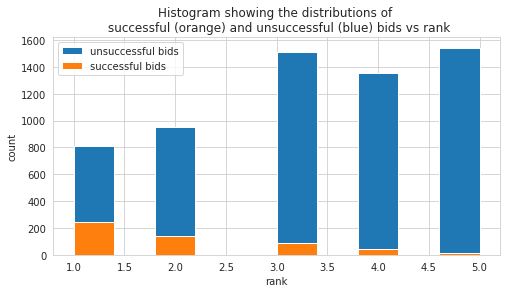

In [16]:
plt.figure(figsize=(8,4))
unsuccesful_bids_df['rank'].hist(label='unsuccessful bids')
succesful_bids_df['rank'].hist(label='successful bids')
plt.xlabel('rank')
plt.ylabel('count')
plt.title('Histogram showing the distributions of \n successful (orange) and unsuccessful (blue) bids vs rank')
plt.legend()

As expected, a larger proportion of the higher rank bids are succesful.

In [19]:
# Click distribution by rank
click_dist_by_rank = pd.DataFrame(index=[1,2,3,4,5])
click_dist_by_rank['clicked'] = (unsuccesful_bids_df[unsuccesful_bids_df['click_int'] == 1][['rank','click_int']].groupby(by='rank').count())
click_dist_by_rank['not_clicked'] = (unsuccesful_bids_df[unsuccesful_bids_df['click_int'] == 0][['rank','click_int']].groupby(by='rank').count())
print(click_dist_by_rank)

   clicked  not_clicked
1      332          482
2      172          783
3      142         1366
4       70         1285
5       19         1524


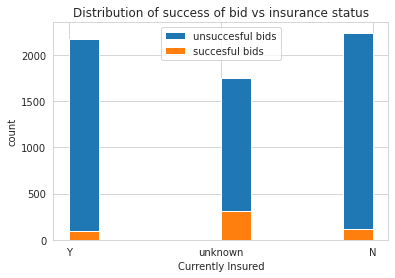

In [21]:
unsuccesful_bids_df['Currently Insured'].hist(label='unsuccesful bids')
succesful_bids_df['Currently Insured'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs insurance status')
plt.xlabel('Currently Insured')
plt.ylabel('count')
plt.legend()

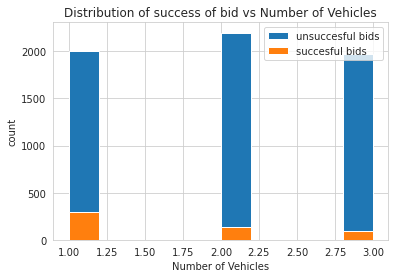

In [22]:
unsuccesful_bids_df['Number of Vehicles'].hist(label='unsuccesful bids')
succesful_bids_df['Number of Vehicles'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('count')
plt.legend()

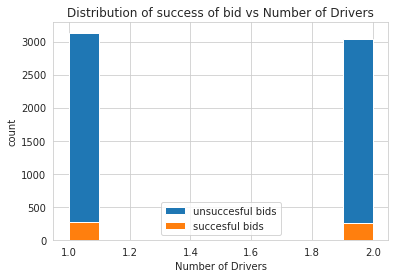

In [23]:
unsuccesful_bids_df['Number of Drivers'].hist(label='unsuccesful bids')
succesful_bids_df['Number of Drivers'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Number of Drivers')
plt.xlabel('Number of Drivers')
plt.ylabel('count')
plt.legend()

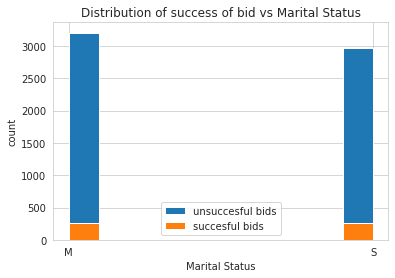

In [24]:
unsuccesful_bids_df['Marital Status'].hist(label='unsuccesful bids')
succesful_bids_df['Marital Status'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('count')
plt.legend()